1. Import Library and Read DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

3. Data Preprocessing and LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
data['sex']=le_encoder.fit_transform(data['sex'])
data['smoker']=le_encoder.fit_transform(data['smoker'])
data['region']=le_encoder.fit_transform(data['region'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


4. Is there any outlier?

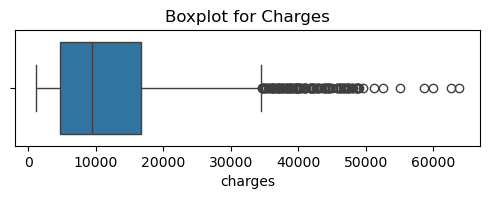

In [9]:
plt.figure(figsize=(6, 1.5))
sns.boxplot(data['charges'],orient='h')
plt.title('Boxplot for Charges')
plt.show()

In [10]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [11]:
data = cap_outliers(data, 'charges')

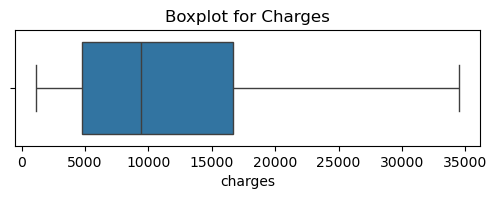

In [12]:
plt.figure(figsize=(6, 1.5))
sns.boxplot(data['charges'],orient='h')
plt.title('Boxplot for Charges')
plt.show()

5. Features and Targets

In [13]:
from sklearn.preprocessing import StandardScaler
X = data.drop('charges', axis=1)  
Y = data['charges']              

6. Split Data into Train and Test

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


7. ANN Regression

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import RMSprop

In [16]:
def build_model():
    model=Sequential()
    #Input Shape = Number of features
    model.add(Input(shape=(6,)))
    #units = 32 (number of neurons), activation function='relu'
    #Input Layer
    model.add(Dense(units=128, activation='relu'))
    #Hidden Layer - I
    model.add(Dense(units=256, activation='relu'))
    #Hidden Layer - II
    model.add(Dense(units=512, activation='relu'))
    #Output Layer
    model.add(Dense(units=1))

    model.compile(loss='mean_squared_error',optimizer='RMSprop',metrics=['mean_squared_error','mean_absolute_error'])
    
    return model

In [17]:
model=build_model()

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,017 (648.50 KB)

 Trainable params: 166,017 (648.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#epochs - number of iterations
#batch-size = sample size in each iteration of each epoch
#validation_split - 20% of overall training sample
history = model.fit(x_train, y_train,validation_split=0.2,epochs=600,batch_size=32)


Epoch 1/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 238543536.0000 - mean_absolute_error: 11510.2617 - mean_squared_error: 238543536.0000 - val_loss: 136393424.0000 - val_mean_absolute_error: 7557.0527 - val_mean_squared_error: 136393424.0000
Epoch 2/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121080688.0000 - mean_absolute_error: 7579.5659 - mean_squared_error: 121080688.0000 - val_loss: 77733808.0000 - val_mean_absolute_error: 7182.8433 - val_mean_squared_error: 77733808.0000
Epoch 3/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94814264.0000 - mean_absolute_error: 8181.7715 - mean_squared_error: 94814264.0000 - val_loss: 77149488.0000 - val_mean_absolute_error: 7010.3223 - val_mean_squared_error: 77149488.0000
Epoch 4/600
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94656688.0000 - mean_absolute_error: 8126.2578 - mean_squared_error: 94656688.0000 - val_loss: 77493096.0000 - val_mean_absolute_error: 7297.3574 - val_mean_squared_error: 77493096.0000
Epoch 5/600


<Axes: >

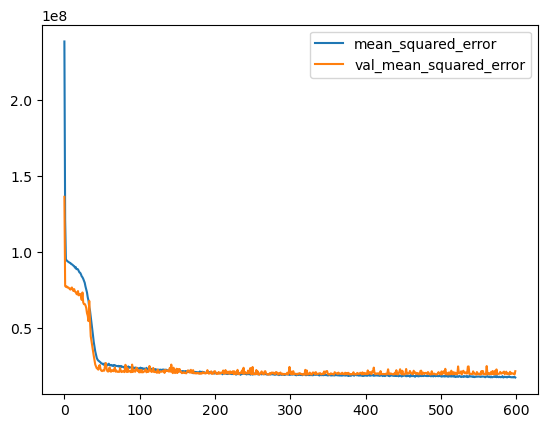

In [20]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [21]:
predictions=model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.792665891040131

In [23]:
results=pd.DataFrame(predictions,columns=['Predicted Value'])

In [24]:
import numpy as np
results['Actual Value']=np.array(y_test)

<Axes: >

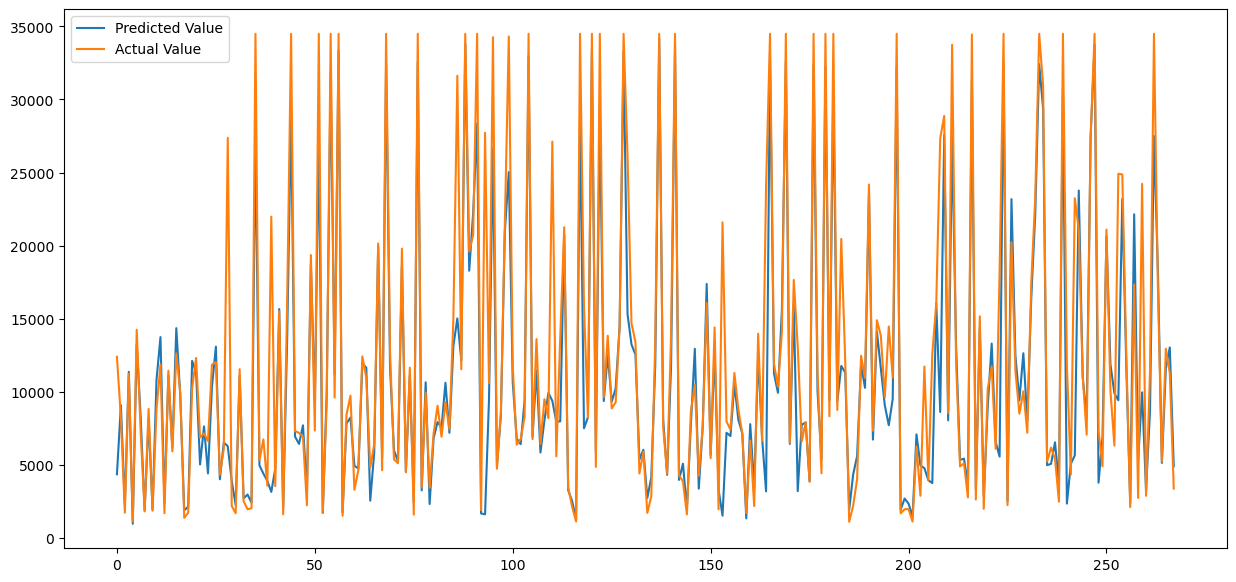

In [25]:
results.plot(figsize=(15,7))